In [12]:
import pandas as pd
import mytools 

In [13]:
数据表 = mytools.读取SPSS数据文件(R'data\国家认同数据清理后.sav',True)
数据表.columns

Index(['问卷编号', '调查员', '民族', '政治面貌', '年级', '您觉得自己是个典型的中国人吗',
       '与世界其他国家的人相比中国人有自己的特点吗', '为公民，最基本的要求是爱自己的国家', '不管是汉族还是少数民族，都是中华民族的一员',
       '您是否为为中华民族的历史文化而骄傲', '个人的前途与命运是与中华民族的命运息息相关', '您是否了解中华民族的传统节日',
       '您是否了解中国历史、地理、政治等', '老实说，您觉得中国怎么样', '您认为中国有多少值得自豪的地方',
       '您认为世界有多少比例的人尊重中国', '对您而言作为一名中国人有多重要', '会以中国人自豪吗', '会隐瞒身份吗', '会打多少分',
       '国歌升起', '世博会', '中国传统文化', '发展信心', '你会为中国运动员呐喊助威', '遇到灾难时中国人应该伸出援手',
       '你愿意加入其他国籍吗', '中国人要为祖国统一奋斗吗'],
      dtype='object')

In [14]:
# 创建民族、年级和政治面貌的交互表
cross_tab = pd.crosstab(index=[数据表['年级'], 数据表['您觉得自己是个典型的中国人吗']], 
                        columns=数据表['政治面貌'], 
                        margins=True, normalize=True)  # All 行和列的总和

cross_tab

政治面貌                      团员        党员        群众        其他       All
年级  您觉得自己是个典型的中国人吗                                                  
预科  一般般             0.010270  0.000000  0.000000  0.000000  0.010270
    可以算             0.001284  0.000000  0.000000  0.000000  0.001284
    完全是             0.003851  0.000000  0.001284  0.000000  0.005135
大一  完全不是            0.008986  0.000000  0.002567  0.001284  0.012837
    不太算             0.010270  0.001284  0.001284  0.001284  0.014121
    一般般             0.048780  0.000000  0.001284  0.000000  0.050064
    可以算             0.070603  0.005135  0.011553  0.001284  0.088575
    完全是             0.152760  0.008986  0.016688  0.000000  0.178434
大二  完全不是            0.008986  0.000000  0.000000  0.000000  0.008986
    不太算             0.015404  0.008986  0.005135  0.000000  0.029525
    一般般             0.033376  0.005135  0.001284  0.000000  0.039795
    可以算             0.074454  0.006418  0.007702  0.003851  0.092426
    完全是             0.112965  0.014121  0.019255  0.002567  0.148909
大三  不太算             0.005135  0.006418  0.003851  0.000000  0.015404
    一般般             0.021823  0.003851  0.008986  0.001284  0.035944
    可以算             0.043646  0.026958  0.008986  0.003851  0.083440
    完全是             0.041078  0.019255  0.006418  0.005135  0.071887
大四  完全不是            0.000000  0.002567  0.001284  0.000000  0.003851
    不太算             0.002567  0.001284  0.000000  0.000000  0.003851
    一般般             0.015404  0.002567  0.002567  0.000000  0.020539
    可以算             0.017972  0.006418  0.005135  0.000000  0.029525
    完全是             0.037227  0.012837  0.005135  0.000000  0.055199
All                 0.736842  0.132221  0.110398  0.020539  1.000000

In [15]:
from scipy import stats
# 假设我们关注的是第二年级的学生（假设年级用数字“2”表示）
specific_grade = '大二'

# 筛选出特定年级的数据
df_specific_grade = 数据表[数据表['年级'] == specific_grade]

# 创建会打多少分和政治面貌的交互表
cross_tab_specific_grade = pd.crosstab(df_specific_grade['会打多少分'], df_specific_grade['政治面貌'])

# 进行卡方检验
chi2_grade, p_grade, dof_grade, expected_grade = stats.chi2_contingency(cross_tab_specific_grade)

chi2_grade, p_grade, dof_grade, 

(20.269905911839633, 0.06214943009111473, 12)

In [16]:
mytools.两个无序类别变量的统计分析(df_specific_grade,'政治面貌','您觉得自己是个典型的中国人吗')

tau_y系数: 0.0165 极弱相关或无相关
您觉得自己是个典型的中国人吗      完全不是       不太算       一般般       可以算       完全是       All
政治面貌                                                                      
团员              0.028112  0.048193  0.104418  0.232932  0.353414  0.767068
党员              0.000000  0.028112  0.016064  0.020080  0.044177  0.108434
群众              0.000000  0.016064  0.004016  0.024096  0.060241  0.104418
其他              0.000000  0.000000  0.000000  0.012048  0.008032  0.020080
All             0.028112  0.092369  0.124498  0.289157  0.465863  1.000000
卡方值： 20.16, p值： 0.0640,自由度:12。
接受虚无假设


In [17]:
import plotly.express as px
fig = px.pie(df_specific_grade, names="政治面貌")
fig.show()

In [18]:
import pandas as pd
import mytools 

In [19]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
  


In [20]:
# 1. 读取CSV文件  
data = pd.read_csv("data\\类别变量练习数据.csv", encoding='gbk')

In [21]:
# 2. 描述父母职业的分布  
print(data['父亲工作'].value_counts())  
print(data['母亲工作'].value_counts())  

父亲工作
市公安局              2
区建豪汽修中心           2
市财政局              2
市住建局              2
盛泰房地产公司           2
中铁六局太原铁路建设公司      1
娟红杂粮食府            1
家庭父母              1
公安局               1
西区管委会             1
XXX建设局            1
银中源工贸有限公司         1
广东省中海油            1
中国兵器工业公司三冶炼       1
市政管理处             1
市团委               1
万民工程建设有限公司        1
省监狱局              1
家庭主妇              1
江苏路之久工程建设有限公司     1
瑞禾农资              1
市纪委               1
市委办               1
第十一中学北侧校园书店       1
万盛体能拓展中心鑫多米便利店    1
XXX镇政府            1
凯信会议服务有限公司        1
陇风巢浴              1
银光聚银化工有限公司        1
元拓科技咨询有限公司        1
市广播电视大学           1
市经济合作局\n          1
陕西省水利水电第三工程局      1
渭源陇原恒新畜牧科技有限公司    1
市民政局              1
北京路九洋菜市场刘伟鲜面店     1
市第一人民医院           1
市农业农村局            1
老姐饺子馆             1
大市场清华电动工具         1
市统计局              1
县瑞金路锦辉消防工程有限公司    1
市农业综合行政执法队        1
大禹工程咨询有限公司        1
市中级人民法院           1
家庭父亲              1
市旅游局              1
长通公司              1
Name: count, dtype: int64
母亲工作
家庭主妇

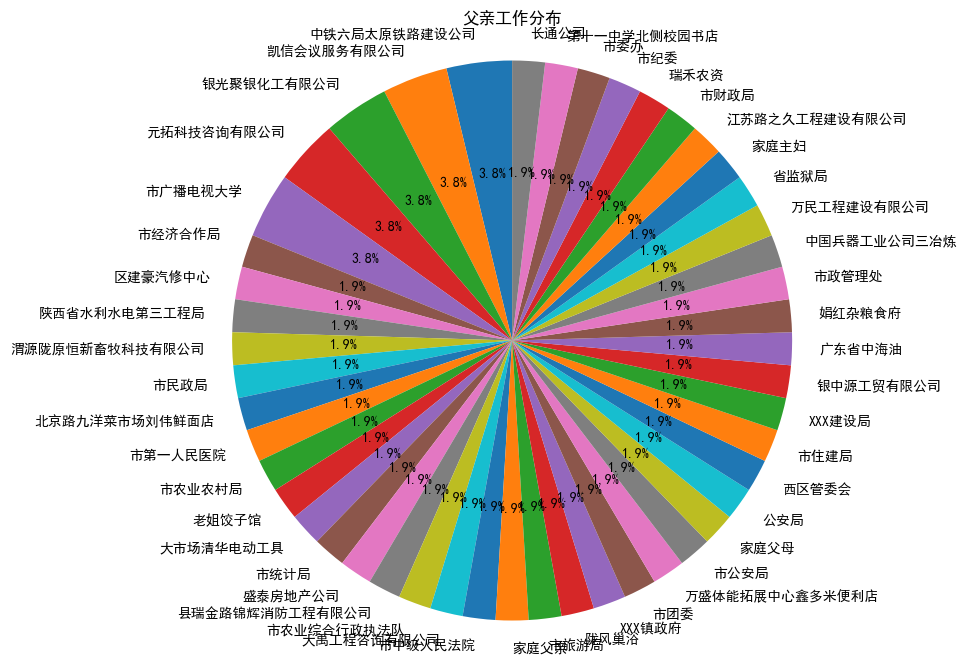

In [22]:
# 3. 创建父母职业的饼图  
fig, ax = plt.subplots(figsize=(10, 8))  
ax.pie(data['父亲工作'].value_counts(), labels=data['父亲工作'].unique(), autopct='%1.1f%%', startangle=90)  
ax.axis('equal')  # 使饼图呈圆形  
plt.title("父亲工作分布")  
plt.show()  

Text(0.5, 1.0, '母亲工作分布')

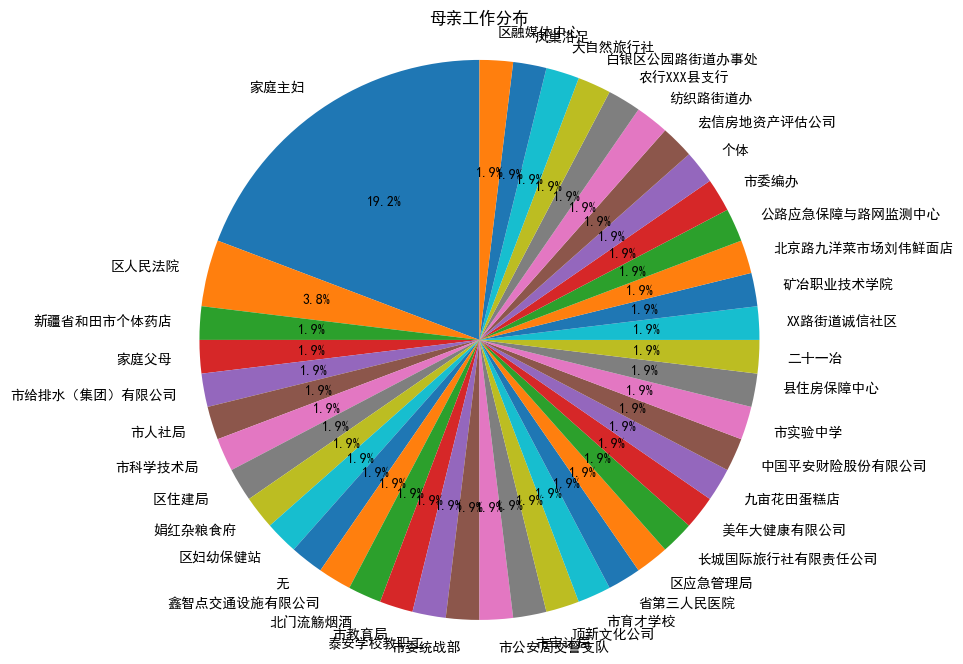

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))  
ax.pie(data['母亲工作'].value_counts(), labels=data['母亲工作'].value_counts().index.tolist(), autopct='%1.1f%%', startangle=90)  
ax.axis('equal')  # 使饼图呈圆形  
plt.title("母亲工作分布")

In [24]:
import pandas as pd  
  
try:  
    data = pd.read_csv('data\类别变量练习数据.csv', encoding='gbk')  # 尝试使用 'gbk' 编码  
    # 其他代码...  
except UnicodeDecodeError as e:  
    print(f"解码错误: {e}")
    # 导入所需的库
import pandas as pd
# 创建父母工作的交叉分析表
cross_table = pd.crosstab(data['父亲单位'], data['母亲单位'])
print(cross_table)

母亲单位  个体户  事业编  国企  无  民企
父亲单位                     
个体户     3    1   0  1   0
事业编     0   17   1  3   4
国企      0    1   0  2   1
无       0    1   0  2   0
民企      3    4   0  4   2


In [25]:
import pandas as pd  
  
try:  
    data = pd.read_csv('data\类别变量练习数据.csv', encoding='gbk')  # 尝试使用 'gbk' 编码  
except UnicodeDecodeError as e:  
    print(f"解码错误: {e}")  
    exit()  # 退出程序  
  
cross_table = pd.crosstab(data['父亲单位'], data['母亲单位'])  
cross_table = cross_table.applymap(lambda x: f"{x*100}%")
  
print(cross_table)

母亲单位   个体户    事业编    国企     无    民企
父亲单位                               
个体户   300%   100%    0%  100%    0%
事业编     0%  1700%  100%  300%  400%
国企      0%   100%    0%  200%  100%
无       0%   100%    0%  200%    0%
民企    300%   400%    0%  400%  200%


In [26]:
# 创建一个映射字典，将职业名称映射到数字  
job_mapping = {value: i for i, value in enumerate(data['父亲工作'].unique())}  
  
# 使用映射字典将'父亲工作'和'母亲工作'列中的职业名称转换为数字  
data['父亲工作'] = data['父亲工作'].map(job_mapping)  
data['母亲工作'] = data['母亲工作'].map(job_mapping)  
  
# 计算皮尔逊相关系数  
correlation = data[['父亲工作', '母亲工作']].corr(method='pearson')  
print("父母工作的相关系数: ", correlation)

父母工作的相关系数:            父亲工作      母亲工作
父亲工作  1.000000  0.195009
母亲工作  0.195009  1.000000


In [27]:
import pandas as pd  
import numpy as np  
  
# 读取CSV文件  
data = pd.read_csv('data\类别变量练习数据.csv', encoding='gbk')
  
# 确保数据是数字类型  
data = data.apply(pd.to_numeric, errors='coerce')  
  
# 计算父母职业的相关系数  
parent1_corr = data.corrwith(data['父亲工作'])  
parent2_corr = data.corrwith(data['母亲工作'])  
  
# 打印相关系数  
print(f"父亲工作数据的相关系数：{parent1_corr}")  
print(f"母亲工作与数据的相关系数：{parent2_corr}")  
  
# 解释相关系数  
print(f"相关系数的范围是-1到1。接近1表示强正相关,接近-1表示强负相关,接近0表示没有相关性。")  
print(f"因此，父亲职业与数据的相关系数为{parent1_corr}，表示两者之间存在强正相关关系。")  
print(f"母亲职业与数据的相关系数为{parent2_corr}，表示两者之间存在强正相关关系。")

父亲工作数据的相关系数：父亲工作   NaN
父亲单位   NaN
母亲工作   NaN
母亲单位   NaN
dtype: float64
母亲工作与数据的相关系数：父亲工作   NaN
父亲单位   NaN
母亲工作   NaN
母亲单位   NaN
dtype: float64
相关系数的范围是-1到1。接近1表示强正相关,接近-1表示强负相关,接近0表示没有相关性。
因此，父亲职业与数据的相关系数为父亲工作   NaN
父亲单位   NaN
母亲工作   NaN
母亲单位   NaN
dtype: float64，表示两者之间存在强正相关关系。
母亲职业与数据的相关系数为父亲工作   NaN
父亲单位   NaN
母亲工作   NaN
母亲单位   NaN
dtype: float64，表示两者之间存在强正相关关系。
